In [ ]:
# things we need for NLP
import nltk
nltk.download('punkt')
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
nltk.download('stopwords')
from nltk.corpus import stopwords

import pandas as pd
import numpy as np
import random

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import utils
from keras import layers

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# import our chat-bot intents file
intents = pd.read_csv("./data/travel-suggest-intents.csv")

intents.head()

,intent,tag
0,Hi,greeting
1,How are you,greeting
2,Is anyone there,greeting
3,Hello,greeting
4,Good day,greeting


In [ ]:
len(intents.index)

4249

In [ ]:
words = []
classes = []
documents = []
ignore_words = ['?', '!']
stopwords = set(stopwords.words('english'))
# loop through each sentence in our intents patterns
for index, intent in intents.iterrows():
      # tokenize each word in the sentence
      w = nltk.word_tokenize(intent['intent'])
      # add to our words list
      words.extend(w)
      # add to documents in our corpus
      documents.append((w, intent['tag']))
      # add to our classes list
      if intent['tag'] not in classes:
          classes.append(intent['tag'])

# stem and lower each word and remove duplicates
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words and w not in stopwords]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents", documents)
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

4249 documents [(['Hi'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Is', 'anyone', 'there'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['Hello', 'bot'], 'greeting'), (['Are', 'you', 'there'], 'greeting'), (['Nice', 'to', 'meet', 'you'], 'greeting'), (['Bye'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['Thanks'], 'thanks'), (['Thank', 'you'], 'thanks'), (['That', "'s", 'helpful'], 'thanks'), (['thank', 'you', 'for', 'your', 'help'], 'thanks'), (['that', 'a', 'greate', 'idea'], 'thanks'), (['that', 'a', 'good', 'idea'], 'thanks'), (['What', 'you', 'can', 'do'], 'help'), (['What', 'do', 'you', 'doing'], 'help'), (['help'], 'help'), (['how', 'you', 'can', 'help', 'me'], 'help'), (['suggest', 'tourist', 'for', 'me'], 'suggest'), (['I', 'want', 'to', 'find', 'a', 'tourist', 'destination'], 'suggest'), (['find', 'a', 'destination'], 'suggest'), (['find', 'tourist'], 'suggest'), (['I', 'want', 'to', 'find', 'a', 'destinat

In [ ]:
# create our training data
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    # print(classes.index(doc[1]))
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

In [ ]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists
x = list(training[:,0])
y = list(training[:,1])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(len(x_train[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y_train[0]), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(np.array(x_train), np.array(y_train), validation_data=(x_test,y_test), epochs=50, batch_size=200)
model.save('model_ChatBot.h5')

Epoch 1/50
20/20 [==============================] - 17s 838ms/step - loss: 2.2798 - acc: 0.1980 - val_loss: 2.0767 - val_acc: 0.2494
Epoch 2/50
20/20 [==============================] - 1s 34ms/step - loss: 1.9983 - acc: 0.2686 - val_loss: 1.8217 - val_acc: 0.3741
Epoch 3/50
20/20 [==============================] - 1s 32ms/step - loss: 1.7839 - acc: 0.3454 - val_loss: 1.5580 - val_acc: 0.4824
Epoch 4/50
20/20 [==============================] - 1s 33ms/step - loss: 1.4972 - acc: 0.4673 - val_loss: 1.2515 - val_acc: 0.6471
Epoch 5/50
20/20 [==============================] - 1s 34ms/step - loss: 1.1864 - acc: 0.5884 - val_loss: 0.9752 - val_acc: 0.7388
Epoch 6/50
20/20 [==============================] - 1s 33ms/step - loss: 0.9360 - acc: 0.6846 - val_loss: 0.8116 - val_acc: 0.7671
Epoch 7/50
20/20 [==============================] - 1s 35ms/step - loss: 0.7584 - acc: 0.7526 - val_loss: 0.6858 - val_acc: 0.7953
Epoch 8/50
20/20 [==============================] - 1s 39ms/step - loss: 0.6283 -

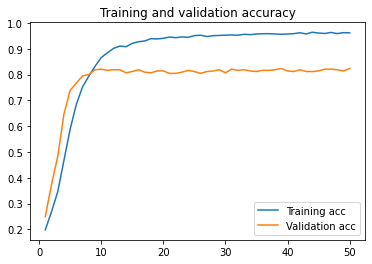

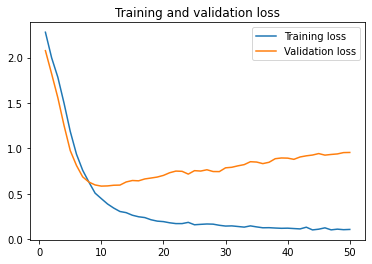

In [ ]:
history_dict = history.history
history_dict.keys()
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))

In [ ]:
#--------------------------
# FIND DESTINATION
#-------------------------- 
destinations_file = './data/destination_data.json'

# import our chat-bot intents file
with open(destinations_file) as json_data:
    destinations_file = json.load(json_data)
    
def predict_destination(userID):
    if userID in context:
        print ('User ID:', userID)
        print ('User context:', context[userID])
        for row in destinations_file['destinations']:
            if array_diff(row['tags'], context[userID]):
                context[userID] = []
                return row['desciption']
    return -1
    

def array_diff(arr1, arr2):
    for elm in arr1:
        if elm not in arr2:
            return False
    return True

In [ ]:
import json

reponses_file = './data/travel-suggest-reponses.json'

# import our chat-bot reponses file
with open(reponses_file) as json_data:
    reponses = json.load(json_data)

In [ ]:
# create a data structure to hold user context
context = {}

ERROR_THRESHOLD = 0.65
def classify(sentence):
    # generate probabilities from the model
    p = bow(sentence, words)
    
    d = len(p)
    f = len(documents)-2
    a = np.zeros([f, d])
    tot = np.vstack((p,a))
    
    results = model.predict(tot)[0]
    
    # filter out predictions below a threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))
    # return tuple of intent and probability
    return return_list

def response(sentence, userID, show_details=False):
    results = classify(sentence)
    # Print detail
    if show_details: print('Classify result:', results)        
    # if we have a classification then find the matching intent tag
    if results:
        classified_tag = results[0][0]
        if userID not in context: context[userID] = []
        if classified_tag not in context[userID]: context[userID].append(classified_tag)
        if show_details: print('User\'s tags:', context[userID])
        # loop as long as there are matches to process
        while results:
            for row in reponses['data_set']:
                # find a tag matching the first result
                if row['tag'] == classified_tag:
                    # check if this intent is contextual and applies to this user's conversation
                    if not 'context_filter' in row or \
                        (userID in context and 'context_filter' in row and row['context_filter'] in context[userID]):
                        # a random response from the intent
                        response = (random.choice(row['responses']))
                        # get a suggest, if have a suggest, suggest it
                        destination = predict_destination(userID)
                        if destination != -1:
                            return destination
                        else:
                            return response
            results.pop(0)

In [ ]:
def chat():
	print("Start Talking with the bot(type quit to stop!")
	id = input("Enter ID: ")
	while True:
		inp = input("You: ")
		if inp.lower() == "quit":
			break
		print(response(inp, id))

# chat()